# 🏎️ Strategic Pricing Model for German Automotive Market
**Project by: Stephen Richard | Aspiring AI Product Manager**

### 🎯 Business Objective
Membantu dealer mobil bekas menentukan **harga jual yang kompetitif** dan memahami **faktor depresiasi** untuk mobil pabrikan Jerman (BMW, Mercedes, Audi, VW, Porsche).

### 🛠️ Tech Stack
* **Python** (Data Processing)
* **Pandas & NumPy** (Data Manipulation)
* **Seaborn** (Business Visualization)
* **Scikit-Learn** (Predictive Modeling)

**Data Ingestion & Cleaning**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Setup Visualisasi
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# 1. Load Data
# Pastikan file csv ada di satu folder
df = pd.read_csv("car details v4.csv")

# 2. Filter: Fokus ke "The German Big 5"
german_brands = ['BMW', 'Mercedes-Benz', 'Audi', 'Volkswagen', 'Porsche']
df_german = df[df['Make'].isin(german_brands)].copy()

# 3. Currency Conversion (Market Adjustment)
# Mengubah INR (Rupee) ke EUR (Euro) agar relevan dengan pasar Eropa
# Asumsi Kurs: 1 INR = 0.011 EUR
df_german['Price_EUR'] = df_german['Price'] * 0.011

# 4. Cleaning Technical Specs
# Membersihkan kolom Engine (hapus ' cc') dan Transmission
df_german['Engine_CC'] = df_german['Engine'].str.replace(' cc', '', regex=False).astype(float)
df_german['Is_Automatic'] = df_german['Transmission'].apply(lambda x: 1 if x == 'Automatic' else 0)

# Hapus data kosong agar model tidak error
df_german = df_german.dropna(subset=['Engine_CC'])

print(f"✅ Data Ready! Total Unit Mobil Jerman: {len(df_german)}")
df_german.head()

✅ Data Ready! Total Unit Mobil Jerman: 455


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Price_EUR,Engine_CC,Is_Automatic
6,Mercedes-Benz,CLA 200 Petrol Sport,1898999,2015,47000,Petrol,Automatic,Mumbai,White,Second,...,300 Nm @ 1200 rpm,FWD,4630.00,1777.00,1432.00,5.00,NaN,20888.99,1991.00,1
7,BMW,X1 xDrive20d M Sport,2650000,2017,75000,Diesel,Automatic,Coimbatore,White,Second,...,400 Nm @ 1750 rpm,AWD,4439.00,1821.00,1612.00,5.00,51.00,29150.00,1995.00,1
14,Volkswagen,Polo GT TSI,944999,2017,41417,Petrol,Automatic,Bangalore,Grey,First,...,175 Nm @ 1500 rpm,FWD,3971.00,1682.00,1469.00,5.00,45.00,10394.99,1197.00,1
21,Volkswagen,Vento Comfortline Petrol AT,765000,2015,60240,Petrol,Automatic,Bangalore,Brown,First,...,153 Nm @ 3800 rpm,FWD,4384.00,1699.00,1466.00,5.00,55.00,8415.00,1197.00,1
38,Mercedes-Benz,GLC 220 d Progressive,3850000,2017,45600,Diesel,Automatic,Mumbai,Black,Second,...,400 Nm @ 1400 rpm,AWD,4656.00,1890.00,1639.00,5.00,66.00,42350.00,2143.00,1


**EDA**

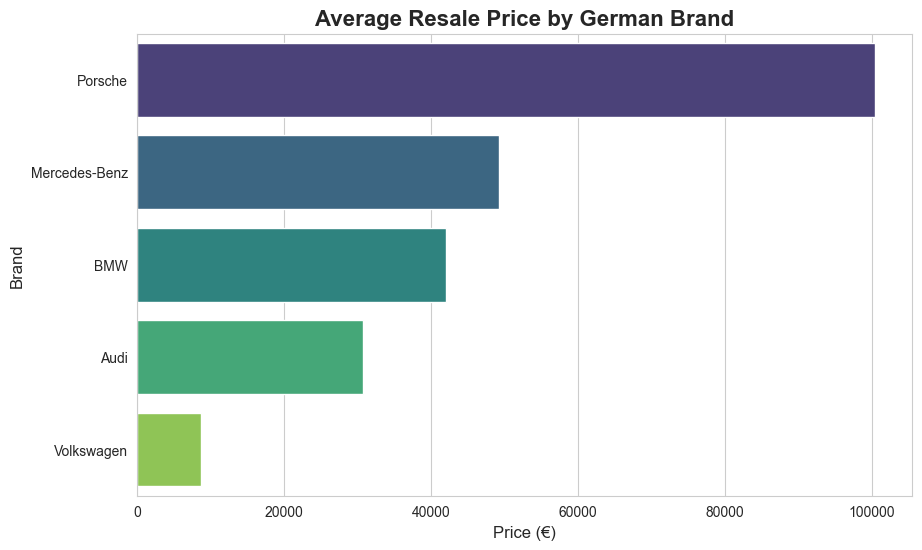

In [3]:
# Analisis Rata-Rata Harga per Brand
brand_price = df_german.groupby('Make')['Price_EUR'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Price_EUR', 
    y='Make', 
    data=brand_price, 
    palette='viridis', 
    hue='Make', 
    legend=False
)

plt.title('Average Resale Price by German Brand', fontsize=16, fontweight='bold')
plt.xlabel('Price (€)', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.show()

**Feature Engineering & Pre-processing**

In [4]:
# 1. One-Hot Encoding (Mengubah Kategori Brand jadi Angka Biner)
# Agar mesin bisa membedakan "Value" dari sebuah Brand (Porsche vs VW)
df_model = pd.get_dummies(df_german, columns=['Make', 'Fuel Type'], drop_first=True)

# 2. Seleksi Fitur (Feature Selection)
features = ['Year', 'Kilometer', 'Engine_CC', 'Is_Automatic']
# Menambahkan kolom dummy brand & fuel secara otomatis
dummy_cols = [col for col in df_model.columns if 'Make_' in col or 'Fuel Type_' in col]
features.extend(dummy_cols)

print("🚀 Features used for Modeling:")
print(features)

# 3. Split Data (80% Train, 20% Test)
X = df_model[features]
y = df_model['Price_EUR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n✅ Data Split Completed.")

🚀 Features used for Modeling:
['Year', 'Kilometer', 'Engine_CC', 'Is_Automatic', 'Make_BMW', 'Make_Mercedes-Benz', 'Make_Porsche', 'Make_Volkswagen', 'Fuel Type_Petrol']

✅ Data Split Completed.


**Machine Learning & Evaluation**

In [5]:
# 1. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# 2. Predict & Evaluate
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("📊 Model Performance Report:")
print(f"---------------------------")
print(f"Accuracy (R2 Score) : {r2:.2f} (Target: >0.70)")
print(f"Avg Error (MAE)     : €{mae:,.2f}")

if r2 > 0.70:
    print("\n✅ STATUS: MODEL PERFORMING WELL (Ready for Business Insights)")
else:
    print("\n⚠️ STATUS: UNDERPERFORMING (Need Optimization)")

📊 Model Performance Report:
---------------------------
Accuracy (R2 Score) : 0.71 (Target: >0.70)
Avg Error (MAE)     : €10,027.01

✅ STATUS: MODEL PERFORMING WELL (Ready for Business Insights)


**Business Insights**

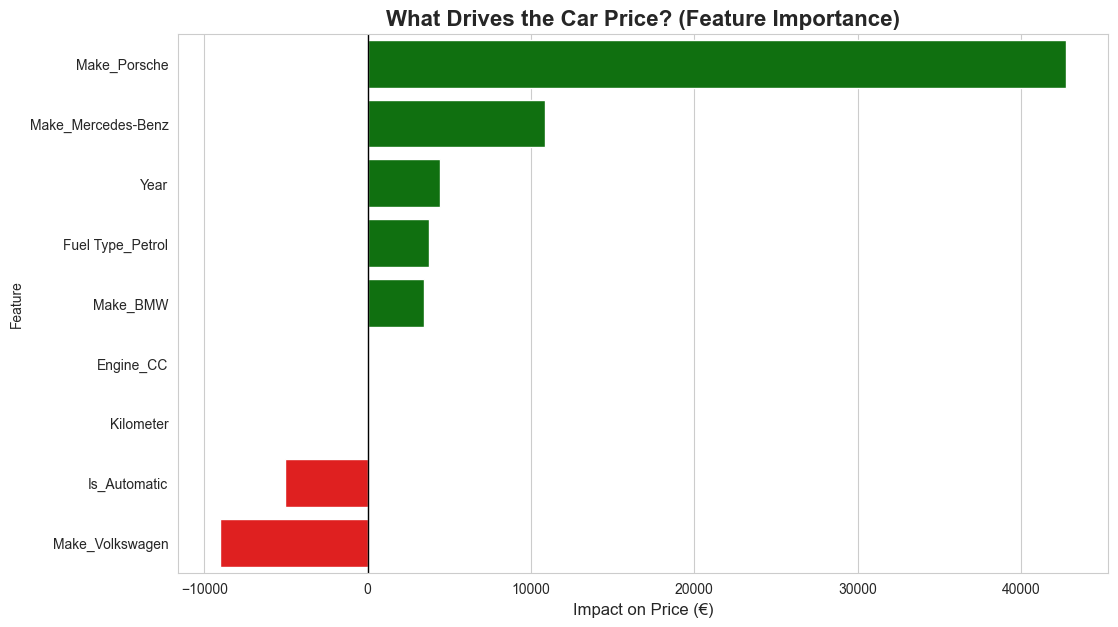

In [6]:
# Mengekstrak "Otak" Model untuk melihat faktor penentu harga
coef_df = pd.DataFrame({
    'Feature': features,
    'Impact (EUR)': model.coef_
})

# Sorting & Coloring
coef_df = coef_df.sort_values(by='Impact (EUR)', ascending=False)
colors_list = ['green' if x > 0 else 'red' for x in coef_df['Impact (EUR)']]
color_dict = dict(zip(coef_df['Feature'], colors_list))

# Visualization
plt.figure(figsize=(12, 7))
sns.barplot(
    x='Impact (EUR)',
    y='Feature',
    data=coef_df,
    hue='Feature',
    palette=color_dict,
    legend=False
)

plt.title('What Drives the Car Price? (Feature Importance)', fontsize=16, fontweight='bold')
plt.xlabel('Impact on Price (€)', fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.show()